In [4]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [5]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
dfa = pd.read_csv('amazon5.txt', sep='\t', names=['review','label'], header=None, encoding='utf-8')
dfi = pd.read_csv('imdb5.txt', delimiter='\s{3,4}', names=['review','label'], header=None, encoding='utf-8')
dfy = pd.read_csv('yelp5.txt', sep='\t', names=['review','label'], header=None, encoding='utf-8')

print('Total de registros de Amazon:', dfa.shape)
print('Total de registros de IMBD:', dfi.shape)
print('Total de registros de Yelp:', dfy.shape)

Total de registros de Amazon: (1000, 2)
Total de registros de IMBD: (1000, 2)
Total de registros de Yelp: (1000, 2)


<ipython-input-6-47a3d1028d09>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dfi = pd.read_csv('imdb5.txt', delimiter='\s{3,4}', names=['review','label'], header=None, encoding='utf-8')


In [7]:
df = pd.concat([dfa, dfi, dfy], ignore_index=True)   
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  3000 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [8]:
df['label'].value_counts()

0    1500
1    1500
Name: label, dtype: int64

In [9]:
X = df.review     # Serie de strings
Y = df.label      # Serie de enteros 0s y 1s

assert X.shape == (3000,)         
assert Y.shape == (3000,)

In [10]:
negwords = [ 'no', 'nor', 'not', 'ain', 'aren', "aren't", 'don', "don't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
mystopwords = [word for word in stopwords.words('english').copy() if word not in negwords]
print(len(mystopwords))
print(mystopwords)

139
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's

In [11]:
def clean_token(doc):
  doc = re.sub(r'\.(?=[^\s])', '. ', doc)
  tokens = word_tokenize(doc)
  tokens = [word.lower() for word in tokens]
  tokens = [word for word in tokens if word.isalpha()]
  tokens = [word for word in tokens if word not in mystopwords]
  tokens = [word for word in tokens if len(word) > 1]

  return tokens

In [12]:
X.head(5)

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
Name: review, dtype: object

In [13]:
Xcleantok = [clean_token(x) for x in X]   

In [14]:
for x in Xcleantok[0:5]:
  print(x)

['no', 'way', 'plug', 'us', 'unless', 'go', 'converter']
['good', 'case', 'excellent', 'value']
['great', 'jawbone']
['tied', 'charger', 'conversations', 'lasting', 'minutes', 'major', 'problems']
['mic', 'great']


In [15]:
lemmatizer = WordNetLemmatizer()

def clean_doc(doc):  
  tokens = [lemmatizer.lemmatize(word) for word in doc]
  # reemplaza cualquier carácter que se repita más de dos veces seguidas por dos ocurrencias de ese carácter. Por ejemplo, 'sooooo good' se convierte en 'soo good'.
  tokens = [re.sub(r'(.)\1{2,}', r'\1\1', word) for word in tokens]

  return tokens

In [16]:
Xclean = [clean_doc(x) for x in Xcleantok]  


In [17]:
Xclean[0:5]  

[['no', 'way', 'plug', 'u', 'unless', 'go', 'converter'],
 ['good', 'case', 'excellent', 'value'],
 ['great', 'jawbone'],
 ['tied', 'charger', 'conversation', 'lasting', 'minute', 'major', 'problem'],
 ['mic', 'great']]

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(Xclean, Y, train_size=.70, shuffle=True, random_state=1) 
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=.50, shuffle=True, random_state=17)

print('X,y Train:', len(x_train), len(y_train))      # los "x_" son "list" y los "y_" son "Series"
print('X,y Val:', len(x_val), len(y_val))
print('X,y Test', len(x_test), len(y_test))

X,y Train: 2100 2100
X,y Val: 450 450
X,y Test 450 450


In [19]:
from collections import Counter

midiccionario = Counter()    

for k in range(len(x_train)):
  midiccionario.update(x_train[k])

print('Longitud del diccionario:', len(midiccionario))  
print('\n(word,frequency):') 
print(midiccionario.most_common(10)) 

Longitud del diccionario: 3595

(word,frequency):
[('not', 225), ('good', 161), ('movie', 140), ('great', 138), ('phone', 133), ('film', 125), ('time', 100), ('one', 99), ('like', 88), ('work', 86)]


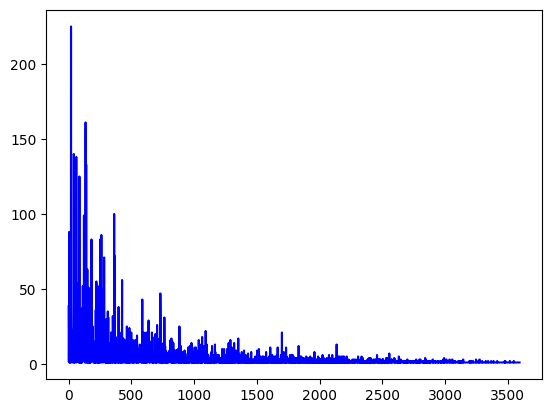

In [20]:
plt.plot(list(np.arange(len(midiccionario))), list(midiccionario.values()), color='blue')
plt.show()

In [21]:
min_freq = 2
midicc = { word: count for word, count in midiccionario.items() if count >= min_freq}

print('Nueva longitud del nuevo vocabulario:', len(midicc))
print(list(midicc.items())[0:5])     

Nueva longitud del nuevo vocabulario: 1510
[('fare', 2), ('much', 39), ('better', 38), ('people', 23), ('like', 88)]


In [22]:
sorted_dic = sorted(midiccionario.items(), key=lambda x: x[1], reverse=True)

midicc = dict(sorted_dic[:1500])

print('Nueva longitud del nuevo vocabulario:', len(midicc))
print(list(midicc.items())[0:5]) 


Nueva longitud del nuevo vocabulario: 1500
[('not', 225), ('good', 161), ('movie', 140), ('great', 138), ('phone', 133)]


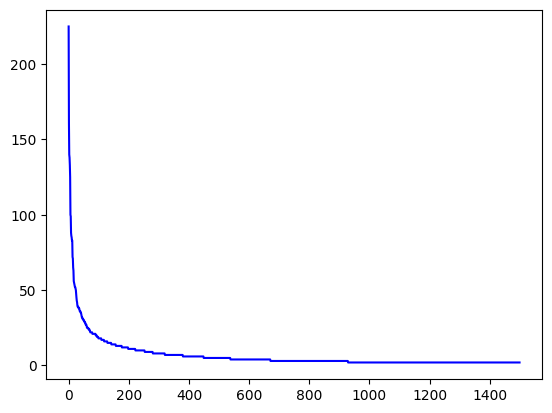

In [23]:
plt.plot(list(np.arange(len(midicc))), list(midicc.values()), color='blue')
plt.show()

In [24]:
train_x = []
for ss in x_train:
  train_x.append([w for w in ss if w in midicc])

val_x = []
for ss in x_val:
  val_x.append([w for w in ss if w in midicc])

test_x = []
for ss in x_test:
  test_x.append([w for w in ss if w in midicc])

In [25]:
for k in range(3):
  print('Antes:', x_train[k])
  print('Después:', train_x[k])

Antes: ['fare', 'much', 'better', 'people', 'like', 'morgan', 'freeman', 'jonah', 'hill', 'ed', 'helm', 'wasted']
Después: ['fare', 'much', 'better', 'people', 'like', 'morgan', 'ed', 'wasted']
Antes: ['tonight', 'elk', 'filet', 'special', 'sucked']
Después: ['tonight', 'filet', 'special', 'sucked']
Antes: ['paid', 'bill', 'not', 'tip', 'felt', 'server', 'terrible', 'job']
Después: ['paid', 'bill', 'not', 'tip', 'felt', 'server', 'terrible', 'job']


#FastText, word2vec de Google y Glove de Stanford

| Modelo | Pros | Contras |
|---|---|---|
|**FastText** (Facebook)|<ul><li>Capaz de generar vectores para palabras fuera del vocabulario entrenado, debido a su enfoque en los n-gramas de caracteres.</li><li>Maneja bien las palabras mal escritas o las palabras con errores de ortografía.</li><li>Soporta más de 150 idiomas.</li><li>Modelos preentrenados fácilmente disponibles.</li></ul>|<ul><li>El tamaño del modelo puede ser bastante grande debido al enfoque en los n-gramas.</li><li>Los vectores generados para palabras fuera del vocabulario pueden no ser siempre semánticamente precisos.</li></ul>|
|**Word2Vec** (Google)|<ul><li>Fácil de usar y comprende dos arquitecturas (CBOW y Skip-Gram), lo que ofrece flexibilidad.</li><li>Los vectores de palabras capturan semánticamente las relaciones entre las palabras (por ejemplo, "rey" - "hombre" + "mujer" se acerca a "reina").</li><li>Los modelos preentrenados están fácilmente disponibles.</li></ul>|<ul><li>No puede generar vectores para palabras fuera del vocabulario entrenado.</li><li>El rendimiento puede ser menor para palabras raras o mal escritas.</li></ul>|
|**GloVe** (Stanford)|<ul><li>Captura tanto la semántica local como la global de las palabras, lo que puede dar lugar a vectores de palabras más precisos.</li><li>Los vectores de palabras capturan semánticamente las relaciones entre las palabras.</li><li>Los modelos preentrenados están fácilmente disponibles.</li></ul>|<ul><li>No puede generar vectores para palabras fuera del vocabulario entrenado.</li><li>El rendimiento puede ser inferior para palabras raras o mal escritas.</li></ul>|



## **FastText**

In [26]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import pickle
import fasttext
import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')  # English
ft = fasttext.load_model('cc.en.300.bin')
# Construimos el diccionario de palabras y sus vectores embebidos
embedding_dict = {word: ft.get_word_vector(word) for word in midicc.keys()}

# Guardamos el diccionario para uso futuro
with open('embedding_dict.pickle', 'wb') as handle:
    pickle.dump(embedding_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Borramos la variable de FastText para liberar memoria RAM
del ft

In [31]:
def comment_to_vector(comment):
    embeddings = []
    for word in comment:
        embedding = embedding_dict.get(word, np.zeros(300))
        embeddings.append(embedding)
    if embeddings:
        average_embedding = np.mean(embeddings, axis=0)
    else:
        average_embedding = np.zeros(300)  
    return average_embedding


In [32]:
trainEmb = np.array([comment_to_vector(comment) for comment in train_x])

valEmb = np.array([comment_to_vector(comment) for comment in val_x])

testEmb = np.array([comment_to_vector(comment) for comment in test_x])

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [36]:
modeloLR = LogisticRegression(max_iter=1000)
modeloLR.fit(trainEmb, y_train)

modeloRF = RandomForestClassifier(n_estimators=100, random_state=0)
modeloRF.fit(trainEmb, y_train)


print('LR: Train-accuracy: %.2f%%' % (100*modeloLR.score(trainEmb, y_train)))
print('LR: Val-accuracy: %2.f%%' % (100*modeloLR.score(valEmb, y_val)))

print('\nRF: Train-accuracy: %.2f%%' % (100*modeloRF.score(trainEmb, y_train)))
print('RF: Val-accuracy: %.2f%%' % (100*modeloRF.score(valEmb, y_val)))


LR: Train-accuracy: 84.43%
LR: Val-accuracy: 82%

RF: Train-accuracy: 99.62%
RF: Val-accuracy: 80.22%


In [37]:
from sklearn.metrics import confusion_matrix
print('Test-accuracy con el mejor modelo Tf-idf %.2f%%' % (100*modeloLR.score(testEmb, y_test)))

pred = modeloLR.predict(testEmb)
print('\nMatriz de confusión con el mejor modelo Tf-idf:')
print(confusion_matrix(y_test, pred, labels=[0,1]))

print('\nMatriz de confusión con el mejor modelo de Tf-idf en proporciones:')
print(confusion_matrix(y_test, pred, labels=[0,1]) / pred.shape[0])

Test-accuracy con el mejor modelo Tf-idf 82.22%

Matriz de confusión con el mejor modelo Tf-idf:
[[175  41]
 [ 39 195]]

Matriz de confusión con el mejor modelo de Tf-idf en proporciones:
[[0.38888889 0.09111111]
 [0.08666667 0.43333333]]


In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100], 
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear', 'saga']
} 

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, verbose=3)
grid.fit(trainEmb, y_train)

print("Best parameters found: ", grid.best_params_)
print("Best score found: ", grid.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.555 total time=   0.1s
[CV 2/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.610 total time=   0.1s
[CV 3/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.567 total time=   0.1s
[CV 4/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.507 total time=   0.1s
[CV 5/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.588 total time=   0.1s
[CV 1/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.557 total time=   1.3s
[CV 2/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.617 total time=   1.3s
[CV 3/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.550 total time=   1.2s
[CV 4/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.507 total time=   0.2s
[CV 5/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.507 total time=   0.3s
[CV 1/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.736 total time=   0.0s
[CV 2/5] END C=0.1, penalty=l2, solver=lib

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .....C=10, penalty=l1, solver=saga;, score=0.790 total time=   9.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .....C=10, penalty=l1, solver=saga;, score=0.814 total time=   9.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .....C=10, penalty=l1, solver=saga;, score=0.836 total time=   8.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=10, penalty=l1, solver=saga;, score=0.843 total time=   9.8s
[CV 5/5] END .....C=10, penalty=l1, solver=saga;, score=0.788 total time=   7.5s
[CV 1/5] END C=10, penalty=l2, solver=liblinear;, score=0.805 total time=   0.1s
[CV 2/5] END C=10, penalty=l2, solver=liblinear;, score=0.829 total time=   0.1s
[CV 3/5] END C=10, penalty=l2, solver=liblinear;, score=0.850 total time=   0.1s
[CV 4/5] END C=10, penalty=l2, solver=liblinear;, score=0.836 total time=   0.1s
[CV 5/5] END C=10, penalty=l2, solver=liblinear;, score=0.788 total time=   0.1s
[CV 1/5] END .....C=10, penalty=l2, solver=saga;, score=0.805 total time=   2.6s
[CV 2/5] END .....C=10, penalty=l2, solver=saga;, score=0.831 total time=   2.4s
[CV 3/5] END .....C=10, penalty=l2, solver=saga;, score=0.850 total time=   2.4s
[CV 4/5] END .....C=10, penalty=l2, solver=saga;, score=0.833 total time=   3.0s
[CV 5/5] END .....C=10, penalty=l2, solver=saga;, score=0.788 total time=   1.6s
[CV 1/5] END C=100, penalty=

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=100, penalty=l1, solver=saga;, score=0.790 total time=  10.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=100, penalty=l1, solver=saga;, score=0.812 total time=  10.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=100, penalty=l1, solver=saga;, score=0.829 total time=   9.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=100, penalty=l1, solver=saga;, score=0.826 total time=  10.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=100, penalty=l1, solver=saga;, score=0.788 total time=  10.0s
[CV 1/5] END C=100, penalty=l2, solver=liblinear;, score=0.793 total time=   0.2s
[CV 2/5] END C=100, penalty=l2, solver=liblinear;, score=0.821 total time=   0.2s
[CV 3/5] END C=100, penalty=l2, solver=liblinear;, score=0.836 total time=   0.2s
[CV 4/5] END C=100, penalty=l2, solver=liblinear;, score=0.831 total time=   0.3s
[CV 5/5] END C=100, penalty=l2, solver=liblinear;, score=0.793 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=100, penalty=l2, solver=saga;, score=0.800 total time=   8.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=100, penalty=l2, solver=saga;, score=0.824 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=100, penalty=l2, solver=saga;, score=0.838 total time=   8.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=100, penalty=l2, solver=saga;, score=0.836 total time=   8.2s
[CV 5/5] END ....C=100, penalty=l2, solver=saga;, score=0.793 total time=   4.6s
Best parameters found:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best score found:  0.8214285714285715


In [44]:
y_pred = grid.predict(valEmb)
print('LR (with Grid Search): Val-accuracy: %.2f%%' % (100*accuracy_score(y_val, y_pred)))


LR (with Grid Search): Val-accuracy: 84.00%


In [45]:
from sklearn.metrics import confusion_matrix
print('Test-accuracy con el mejor modelo Tf-idf %.2f%%' % (100*grid.score(testEmb, y_test)))

pred = grid.predict(testEmb)
print('\nMatriz de confusión con el mejor modelo Tf-idf:')
print(confusion_matrix(y_test, pred, labels=[0,1]))

print('\nMatriz de confusión con el mejor modelo de Tf-idf en proporciones:')
print(confusion_matrix(y_test, pred, labels=[0,1]) / pred.shape[0])

Test-accuracy con el mejor modelo Tf-idf 82.22%

Matriz de confusión con el mejor modelo Tf-idf:
[[178  38]
 [ 42 192]]

Matriz de confusión con el mejor modelo de Tf-idf en proporciones:
[[0.39555556 0.08444444]
 [0.09333333 0.42666667]]


In [38]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
from lightgbm import LGBMClassifier

modeloLGBM = LGBMClassifier()
modeloLGBM.fit(trainEmb, y_train)
print('LGBM: Train-accuracy: %.2f%%' % (100*modeloLGBM.score(trainEmb, y_train)))
print('LGBM: Val-accuracy: %.2f%%' % (100*modeloLGBM.score(valEmb, y_val)))


LGBM: Train-accuracy: 99.62%
LGBM: Val-accuracy: 80.67%


In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [5, 10, 15]
}

grid = GridSearchCV(LGBMClassifier(), param_grid, cv=5, verbose=10)
grid.fit(trainEmb, y_train)

print("Best parameters found: ", grid.best_params_)
print("Best score found: ", grid.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START learning_rate=0.01, max_depth=5, n_estimators=100..........
[CV 1/5; 1/27] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.740 total time=   4.6s
[CV 2/5; 1/27] START learning_rate=0.01, max_depth=5, n_estimators=100..........
[CV 2/5; 1/27] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.738 total time=   2.1s
[CV 3/5; 1/27] START learning_rate=0.01, max_depth=5, n_estimators=100..........
[CV 3/5; 1/27] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.774 total time=   5.7s
[CV 4/5; 1/27] START learning_rate=0.01, max_depth=5, n_estimators=100..........
[CV 4/5; 1/27] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.795 total time=   2.2s
[CV 5/5; 1/27] START learning_rate=0.01, max_depth=5, n_estimators=100..........
[CV 5/5; 1/27] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.762 total time=   2.1s
[CV 1/5; 2/27] START le

In [42]:
from sklearn.metrics import accuracy_score

y_pred = grid.predict(valEmb)
print('LGBM (with Grid Search): Val-accuracy: %.2f%%' % (100*accuracy_score(y_val, y_pred)))


LGBM (with Grid Search): Val-accuracy: 80.89%
